In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pingouin as pg
import pandas as pd

In [2]:
## data parameters

# group means
mean1 = 4
mean2 = 3.8
mean3 = 7

# samples per group
N1 = 30
N2 = 35
N3 = 29

# standard deviation (assume common across groups)
stdev = 2

In [3]:
## now to simulate the data
data1 = mean1 + np.random.randn(N1)*stdev
data2 = mean2 + np.random.randn(N2)*stdev
data3 = mean3 + np.random.randn(N3)*stdev

datacolumn = np.hstack((data1,data2,data3))

# group labels
groups = ['1']*N1 + ['2']*N2 + ['3']*N3

# convert to a pandas dataframe
df = pd.DataFrame({'TheData':datacolumn,'Group':groups})
df

,TheData,Group
0,1.560085,1
1,1.014481,1
2,5.243489,1
3,3.224927,1
4,3.352670,1
...,...,...
89,8.206691,3
90,8.478805,3
91,7.265545,3
92,10.251357,3


In [4]:
# returns the compreessed version of The ANOVA Table
pg.anova(data=df, dv='TheData', between='Group')  # dv = dependent variable

,Source,ddof1,ddof2,F,p-unc,np2
0,Group,2,91,26.972499,6.333389e-10,0.372176


In [7]:
pg.anova(data=df, dv='TheData', between='Group', detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,Group,207.795986,2,103.897993,26.972499,6.333389e-10,0.372176
1,Within,350.531749,91,3.851997,NaN,NaN,NaN


In [5]:
# from the result we can see that group 1 - group 3 and 
# group 2 - group 3 are significantly different
pg.pairwise_tukey(data=df, dv='TheData', between='Group')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,1,2,3.690834,3.877229,-0.186395,0.488321,-0.381705,0.900,-0.093836
1,1,3,3.690834,7.005894,-3.315060,0.511104,-6.486075,0.001,-1.666750
2,2,3,3.877229,7.005894,-3.128665,0.492833,-6.348325,0.001,-1.574740


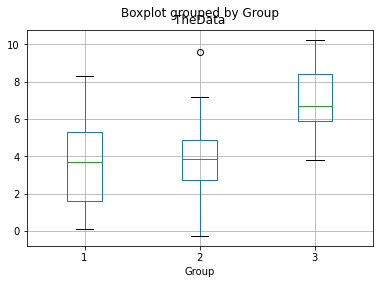

In [6]:
df.boxplot('TheData',by='Group');